# Capstone 3: "And Vinyl-ly"

## This notebook is used for testing functions related to getting and cleaning data

## Imports and setting up Spotipy Client

In [1]:
import numpy as np
import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from collections import defaultdict
from PIL import Image
import requests
import matplotlib.pyplot as plt
from src.get_data import *
import seaborn as sns

plt.style.use('fivethirtyeight')

## Taking a look at my personal vinyl information from Discogs

* They do have an [api](https://www.discogs.com/developers) however for whatever reason I was not able to get my personal collection data, so to make it easy I just downloaded the csv through "**Export My Collection**" option on [my profile](https://www.discogs.com/users/export?w=collection)

In [2]:
# Shows playlists of user, however mine does not seem to be up to date
playlists = sp.user_playlists(128738547)

for playlist in playlists['items']:
    print(playlist['name'])

Skeptical Schematics


In [3]:
albums = pd.read_excel('data/my_albums.ods')
albums['Title'] = albums['Title'].map(str)

In [4]:
# Prints list of the album titles in my albums
for idx, name in enumerate(albums['Title']):
    print(idx, name)

0 The Saga Continues
1 Bon Iver, Bon Iver
2 The Eminem Show
3 An Awesome Wave
4 Ti Amo
5 Rap Album Two
6 Thank You For Today
7 1989
8 None Shall Pass
9 Teenage Dream
10 Greatest Hits 1974-78
11 The Human Condition
12 The Definition
13 Glory Sound Prep
14 Continuum
15 Bob Dylan's Greatest Hits Volume II
16 Illmatic
17 Flower Boy
18 Animals
19 Ye
20 Good News For People Who Love Bad News
21 Boston
22 The Pick Of Destiny
23 Chronicle: 20 Greatest Hits
24 Run The Jewels
25 XXX
26 Some Nights
27 We Don't Need To Whisper
28 Cheshire Cat
29 Camp
30 The Dark Side Of The Moon
31 How To Be A Human Being
32 Currents
33 Leftoverture (Expanded Edition)
34 Aquemini
35 Stankonia
36 Runaround Sue
37 Run The Jewels 2
38 Blink-182
39 Enema Of The State
40 Legends Never Die
41 Professional Rapper
42 I-Empire
43 10 Day
44 Acid Rap
45 Wolf
46 The Now Now
47 Humanz
48 Demon Days
49 Plastic Beach
50 Gorillaz
51 Melophobia
52 Felt 2: A Tribute To Lisa Bonet
53 Overcast! (20 Year Anniversary Remaster)
54 Shado

## Pulling data using the 'get_album_df' function in src/get_data.py

* Ran through this process all files located in the 'data' folder
* Resulting DataFrames ended up being so large that it wouldn't fit in GitHub, so I have them backed up and stored locally in a few places

In [ ]:
#album_df = get_album_df(albums, 'my_vinyls')

# Reading in data and cleaning out a few items to prep for KMeans Clustering

In [5]:
# Combining Data
df_mine = pd.read_csv('../my_vinyls.csv')
df_rolling = pd.read_csv('../rolling_stone_albums.csv')
df_2010s = pd.read_pickle('../2010s_albums.pkl')

In [6]:
df_2010s = df_2010s[['name', 'album', 'year', 'release_date', 'artist', 'featured_artists', 'artist_genres', 
                         'artist_popularity', 'followers', 'track_number', 'tracks_on_album', 'album_label', 
                         'explicit', 'duration_ms', 'popularity', 'danceability', 'energy', 'key', 'loudness', 
                         'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 
                         'tempo', 'tempo_confidence', 'track_length', 'end_fade_in', 'start_fade_out', 'end_silence_time', 
                         'id', 'uri','track_href', 'analysis_url', 'artist_uri','album_uri', 'album_image_url',
                         'artist_spotify_link', 'artist_image_url', 'sections', 'tatums', 'beats', 'bars']]

df_rolling = df_rolling[['name', 'album', 'year', 'release_date', 'artist', 'featured_artists', 'artist_genres', 
                         'artist_popularity', 'followers', 'track_number', 'tracks_on_album', 'album_label', 
                         'explicit', 'duration_ms', 'popularity', 'danceability', 'energy', 'key', 'loudness', 
                         'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 
                         'tempo', 'tempo_confidence', 'track_length', 'end_fade_in', 'start_fade_out', 'end_silence_time', 
                         'id', 'uri','track_href', 'analysis_url', 'artist_uri','album_uri', 'album_image_url',
                         'artist_spotify_link', 'artist_image_url', 'sections', 'tatums', 'beats', 'bars']]

df_mine = df_mine[['name', 'album', 'year', 'release_date', 'artist', 'featured_artists', 'artist_genres', 
                         'artist_popularity', 'followers', 'track_number', 'tracks_on_album', 'album_label', 
                         'explicit', 'duration_ms', 'popularity', 'danceability', 'energy', 'key', 'loudness', 
                         'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 
                         'tempo', 'tempo_confidence', 'track_length', 'end_fade_in', 'start_fade_out', 'end_silence_time', 
                         'id', 'uri','track_href', 'analysis_url', 'artist_uri','album_uri', 'album_image_url',
                         'artist_spotify_link', 'artist_image_url', 'sections', 'tatums', 'beats', 'bars']]

In [7]:
frames = [df_2010s, df_rolling, df_mine]

df_mainframe = pd.concat(frames)

df_mainframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12636 entries, 0 to 1105
Data columns (total 44 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 12636 non-null  object 
 1   album                12636 non-null  object 
 2   year                 12636 non-null  object 
 3   release_date         12636 non-null  object 
 4   artist               12636 non-null  object 
 5   featured_artists     1239 non-null   object 
 6   artist_genres        12636 non-null  object 
 7   artist_popularity    12636 non-null  object 
 8   followers            12636 non-null  object 
 9   track_number         12636 non-null  object 
 10  tracks_on_album      12636 non-null  object 
 11  album_label          12636 non-null  object 
 12  explicit             12636 non-null  int64  
 13  duration_ms          12636 non-null  int64  
 14  popularity           12636 non-null  int64  
 15  danceability         12636 non-null  

In [8]:
# Creating bool value for if an there is an artist feature in the song
df_mainframe['has_featured_artist'] = np.where(df_mainframe['featured_artists'].isna(), 0, 1)

# Filling featured artists with 'No Features' as a string
df_mainframe['featured_artists'].fillna('No Features', inplace=True)

# Little organizing columns and removing a few that seemed unneccesary
df_mainframe = df_mainframe[['name', 'album', 'year', 'release_date', 'artist', 'has_featured_artist', 'featured_artists', 'artist_genres', 
                         'artist_popularity', 'followers', 'track_number', 'tracks_on_album', 'album_label', 
                         'explicit', 'duration_ms', 'popularity', 'danceability', 'energy', 'key', 'loudness', 
                         'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 
                         'tempo', 'tempo_confidence', 'track_length', 'end_fade_in', 'start_fade_out', 'end_silence_time', 
                         'id', 'uri','track_href', 'analysis_url', 'artist_uri','album_uri', 'album_image_url',
                         'artist_spotify_link', 'artist_image_url', 'sections', 'tatums', 'beats', 'bars']]

# Resetting index
df_mainframe.reset_index(inplace=True)

# Removes columns that had string values in what should be a numeric column
messed_rows = df_mainframe[pd.to_numeric(df_mainframe['year'], errors='coerce').isnull()]
df_mainframe.drop(messed_rows.index, inplace=True)

# Modifying columns that were of DType object, when should be numeric
num_cols = ['year', 'track_length', 'tempo_confidence', 'artist_popularity', 'followers', 'track_number', 'tracks_on_album']
df_mainframe[num_cols] = df_mainframe[num_cols].apply(pd.to_numeric)

df_mainframe.drop('index', axis=1, inplace=True)

In [ ]:
# Sanity Check
df_mainframe.info()

In [28]:
X = df_mainframe.select_dtypes(np.number)

# Preproccessing

In [ ]:
from sklearn.prepro

# Choosing amount of clusters

KeyboardInterrupt: 

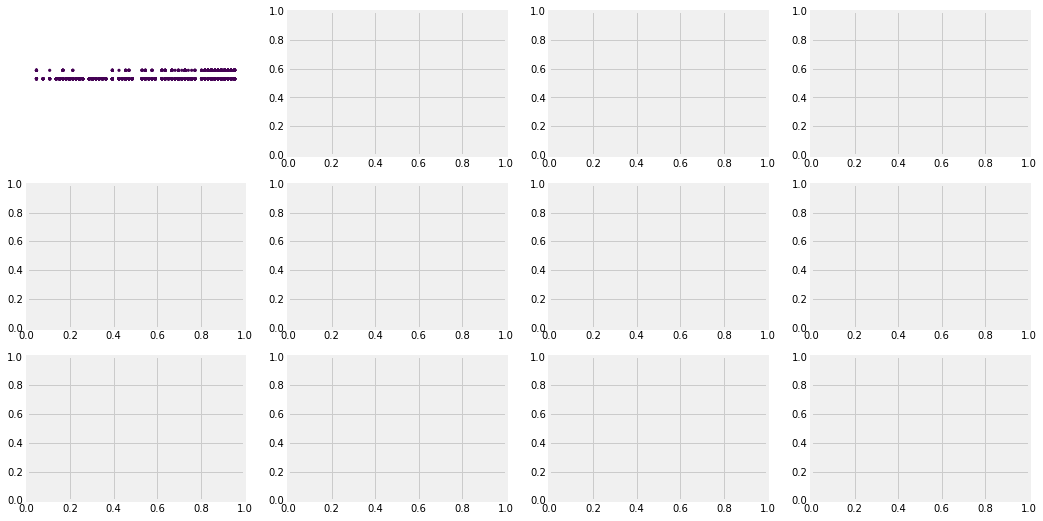

In [30]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import itertools

x = X.values
maxk = 13
wcss = np.zeros(maxk)
silhouette = np.zeros(maxk)

fig, axes = plt.subplots(3, 4, figsize=(16,9))

# flatten
axes = [ax for axrow in axes for ax in axrow]

for k, ax in zip(range(1,maxk), axes):
    km = KMeans(k)
    y = km.fit_predict(x)
    ax.axis('off')
    ax.scatter(x[:,0], x[:,1], c=y, linewidths=0, s=10)
    ax.set_ylim(ymin=-9, ymax=8)
    
    
    for c in range(0, k):
        for i1, i2 in itertools.combinations([ i for i in range(len(y)) if y[i] == c ], 2):
            wcss[k] += sum(x[i1] - x[i2])**2
    wcss[k] /= 2
    
    if k > 1:
        silhouette[k] = silhouette_score(x,y)

# Clustering

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

cluster_pipeline = Pipeline([('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=10, n_jobs=-1))])

X = df_main.select_dtypes(np.number)
cluster_pipeline.fit(X)
y = cluster_pipeline.predict(X)

In [ ]:
df_main['cluster_groups'] = y.tolist()
df_main.head(1).T

In [ ]:
df_corr = df_main.corr()
df_corr

In [ ]:
df_corr['cluster_groups'].sort_values(ascending=True).plot(title='Features Correlations with the groups chosen by K-Means', kind='barh', figsize=(24,40))
plt.tight_layout()
#plt.savefig('images/feature_correlation.png')

In [ ]:
fig, ax = plt.subplots(figsize=(18,18))
sns.heatmap(df_corr, ax=ax)
